In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter

%matplotlib inline

In [54]:
def run_beta_skel(pos_filename, beta=1.0):
    skel = "./LSS_BSK_calc "
    in_filename = "/Users/forero/github/cosmo_datasets/abacus/"+pos_filename
    out_filename =  "beta_{:.1f}_{}".format(beta, pos_filename)
    index_filename = "xdl_beta_skeleton/{}.BSKIndex".format(out_filename)
    if not os.path.exists(index_filename):
        cmd = "./LSS_BSK_calc -beta {} -numNNB {} -input {}  -output {}".format(beta, 50, in_filename, out_filename)
        print(cmd)
        os.system(cmd)
    return index_filename, in_filename


def get_entropy_beta_skel(in_filename, index_filename):
    beta_data = np.int_(np.loadtxt(index_filename))
    point_data = np.loadtxt(in_filename)
    
    # remove the duplicate points using the fact that the first column is ordered in ngl-beta
    ii = beta_data[:,0]<beta_data[:,1]
    beta_data = beta_data[ii]

    n_points = len(point_data)
    #print(n_points)

    # Flattend and count links
    beta_data_flat = beta_data.flatten()
    beta_link_count = Counter(Counter(beta_data_flat).values())

    # Count how many points have zero links
    unique_beta_id = len(set(beta_data_flat))
    if (n_points - unique_beta_id)>0:
        beta_link_count[0] = n_points - unique_beta_id

    assert np.sum(list(beta_link_count.values()))==n_points
    # compute probability array
    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k, beta_link_count[k]/total_link)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    print(proba, proba.sum())
    entropy = np.sum(-proba*np.log(proba)/np.log10(2))
    print('Entropy', entropy)
    return entropy

In [79]:
z_list = ["0.100", "0.300", "0.500", "0.700", "1.000", "1.500"]
beta_values = [1.0, 2.0, 3.0]
index_files = {}
in_files = {}

for i in [1.0, 2.0, 3.0]:
    index_files[i] = {}
    in_files[i] = {}
for z in z_list:
    pos_filename = "sphere_00_stdcosmo_norsd_z{}.dat".format(z)
    for i in [1.0, 2.0, 3.0]:
        index_files[i][z], in_files[i][z] = run_beta_skel(pos_filename, beta=i)

In [80]:
entropy_values = {}
for i in beta_values:
    entropy_values[i] = []
    
for z in z_list:
    for i in beta_values:
        entropy_values[i].append(get_entropy_beta_skel(in_files[i][z], index_files[i][z]))

[4.19270333e-02 7.46851567e-02 1.22440396e-01 1.80361950e-01
 1.97522111e-01 2.07532205e-02 1.05268218e-02 2.18864161e-01
 1.03045087e-01 2.40338396e-03 5.31147856e-03 1.98880023e-02
 4.32609114e-04 1.04547202e-03 8.41184388e-05 3.84541434e-04
 2.64372236e-04 1.20169198e-05 2.40338396e-05 1.20169198e-05
 1.20169198e-05] 1.0
Entropy 6.795492686790359
[4.43123918e-01 1.18090271e-01 3.92532686e-01 3.71082484e-02
 8.92857143e-03 2.16304557e-04] 1.0
Entropy 3.8075793174616863
[5.01201692e-01 2.07063545e-01 2.40963276e-01 1.61026726e-02
 1.32186118e-04 3.45366276e-02] 1.0
Entropy 3.983310262396371
[2.19233579e-01 1.77392575e-01 1.20874012e-01 1.97870315e-01
 7.45168360e-02 2.17174736e-02 1.04336853e-01 4.22505590e-02
 2.07433973e-02 5.36848863e-03 1.11022559e-02 5.53452436e-05
 1.15118107e-03 2.25808594e-03 9.96214385e-05 4.98107193e-04
 4.42761949e-04 6.64142924e-05 2.21380975e-05] 1.0000000000000002
Entropy 6.813821796268463
[3.91479046e-01 9.06555091e-03 4.43846716e-01 1.18804100e-01
 3.6

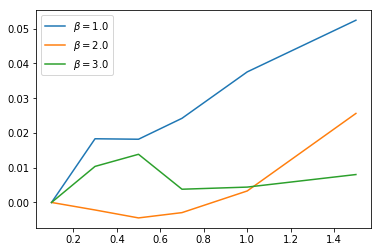

In [81]:
z_numbers = np.float_(np.array(z_list))
plt.plot(z_numbers, np.array(entropy_values[1.0])-entropy_values[1.0][0], label=r"$\beta=1.0$")
plt.plot(z_numbers, np.array(entropy_values[2.0])-entropy_values[2.0][0], label=r"$\beta=2.0$")
plt.plot(z_numbers, np.array(entropy_values[3.0])-entropy_values[3.0][0], label=r"$\beta=3.0$")
plt.legend()